<a href="https://colab.research.google.com/github/stepanjaburek/quantum_social_science_lr/blob/main/24.1.clusters_disciplines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # this asks for your google account
# load data from our private google folder shared among us
data = pd.read_excel("/content/drive/MyDrive/QSS_Colab/keyword_data.xlsx")
metadata = pd.read_excel("/content/drive/MyDrive/QSS_Colab/metadata.xlsx")

journal_data = pd.read_csv("/content/drive/MyDrive/QSS_Colab/journal_data.csv")

centroids = pd.read_csv("/content/drive/MyDrive/QSS_Colab/medoids_centroids_no_operator.csv")
#centroids = pd.read_csv("/content/drive/MyDrive/QSS_Colab/medoids_centroids_w_operator.csv") # PCA and Clustering done with "Operator"
papers_w_clusters = pd.read_csv("/content/drive/MyDrive/QSS_Colab/papers_with_clusters.csv")
#papers_w_clusters = pd.read_csv("/content/drive/MyDrive/QSS_Colab/papers_with_clusters_w_operator.csv") # PCA and Clustering done with "Operator"

In [86]:
metadata=metadata.iloc[:, :7] #keep only relevant columns for now
journal_data=journal_data.iloc[:,:11]

In [89]:
# Clean filenames
papers_w_clusters['filename'] = papers_w_clusters['filename'].str.strip()
metadata['file_name'] = metadata['file_name'].str.strip()

In [ ]:
clusterdata = pd.merge(papers_w_clusters, metadata, left_on='filename', right_on='file_name', how='left')
clusterdata['Publication Title'] = clusterdata['Publication Title'].str.lower()
journal_data['Title'] = journal_data['Title'].str.lower()
clusterdata_disc = pd.merge(clusterdata, journal_data, left_on='Publication Title', right_on='Title', how='left')

# final dataset clusterdata_disc = papers, clusters, metadata, journals, disciplines
#############################################################################################xx
clusterdata_disc

In [ ]:
# Aggregate statistics
categories = clusterdata_disc.groupby('Best Categories')['Best Categories'].count() # science categories - more granular distinction
subjects = clusterdata_disc.groupby('Best Subject Area')['Best Subject Area'].count() # subjects
journals = clusterdata_disc.groupby('Publication Title')['Publication Title'].count() # journals

# Split by clusters
clusters = [clusterdata_disc[clusterdata_disc['cluster'] == i] for i in range(1, 5)]
c1, c2, c3, c4 = clusters

# Per-cluster analysis
c1_journals = c1.groupby('Publication Title')['Publication Title'].count()
cluster_categories = [c.groupby('Best Categories')['Best Categories'].count() for c in clusters]
subject_categories = [c.groupby('Best Subject Area')['Best Subject Area'].count() for c in clusters]

c1_categories, c2_categories, c3_categories, c4_categories = cluster_categories
c1_subjects, c2_subjects, c3_subjects, c4_subjects = subject_categories

#categories
subjects

Vizualize cluster analysis

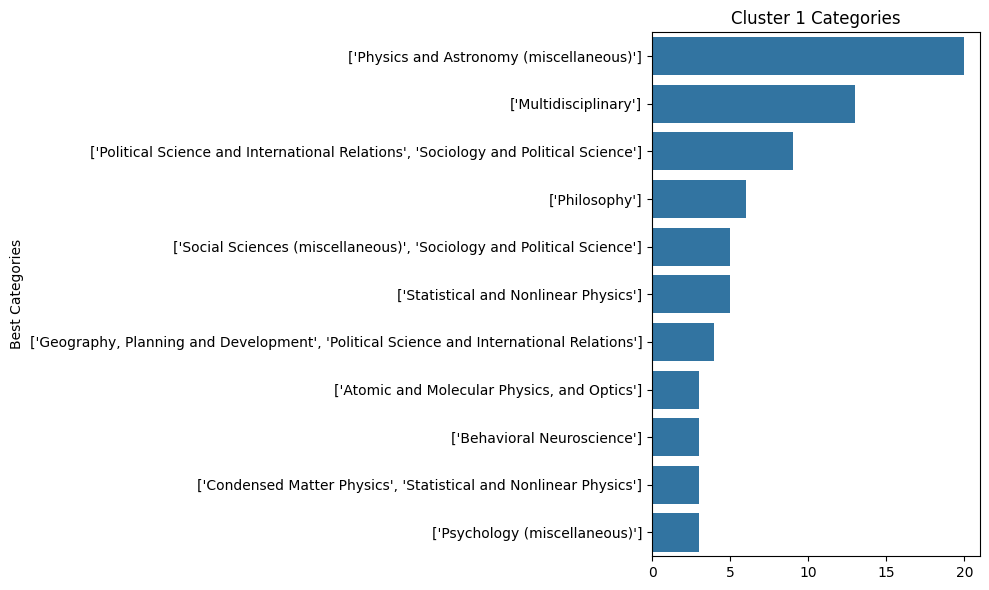

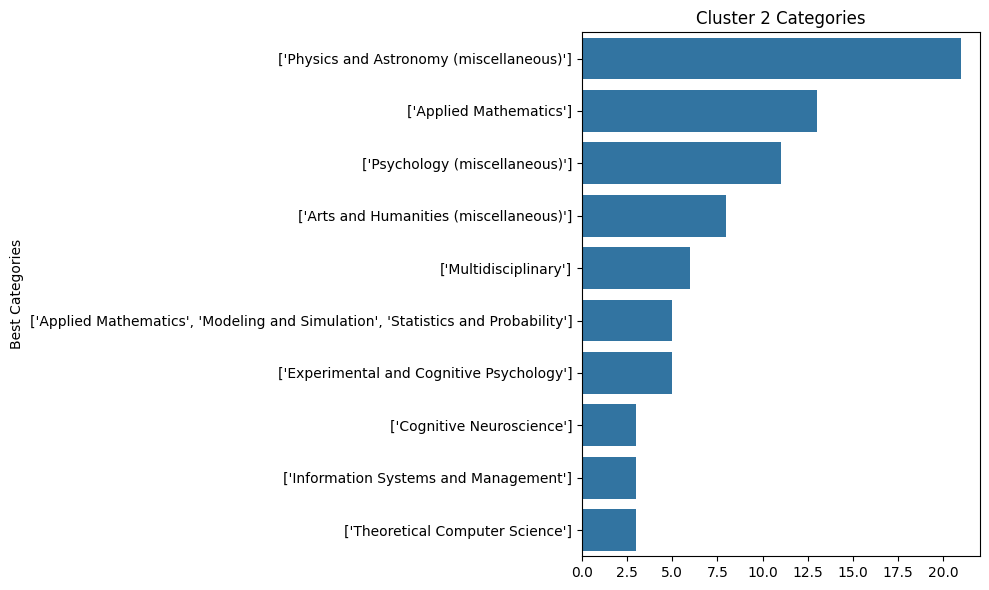

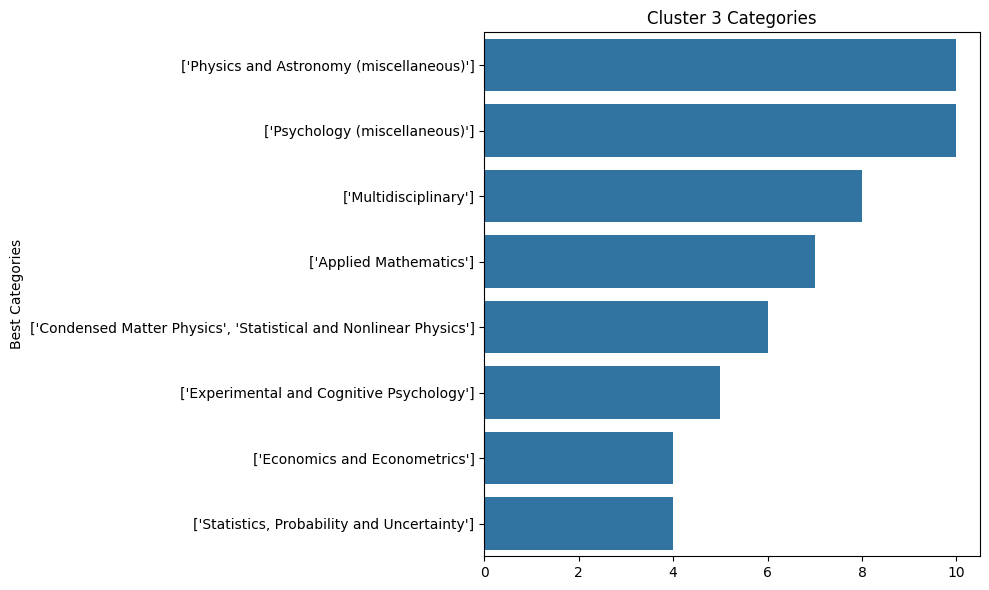

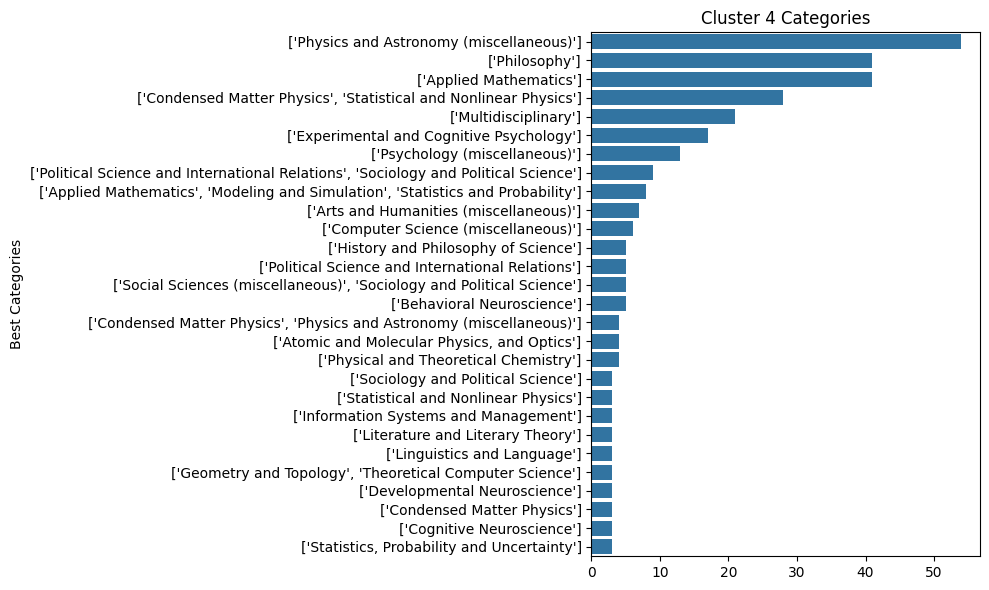

In [120]:
for i, cluster in enumerate(clusters, 1):
   category_counts = cluster.groupby('Best Categories').size()
   category_counts = category_counts[category_counts > 2].sort_values(ascending=False) # shpwing only categories with more than 2 papers
   plt.figure(figsize=(10, 6))
   sns.barplot(x=category_counts.values, y=category_counts.index)
   plt.title(f'Cluster {i} Categories')
   plt.tight_layout()

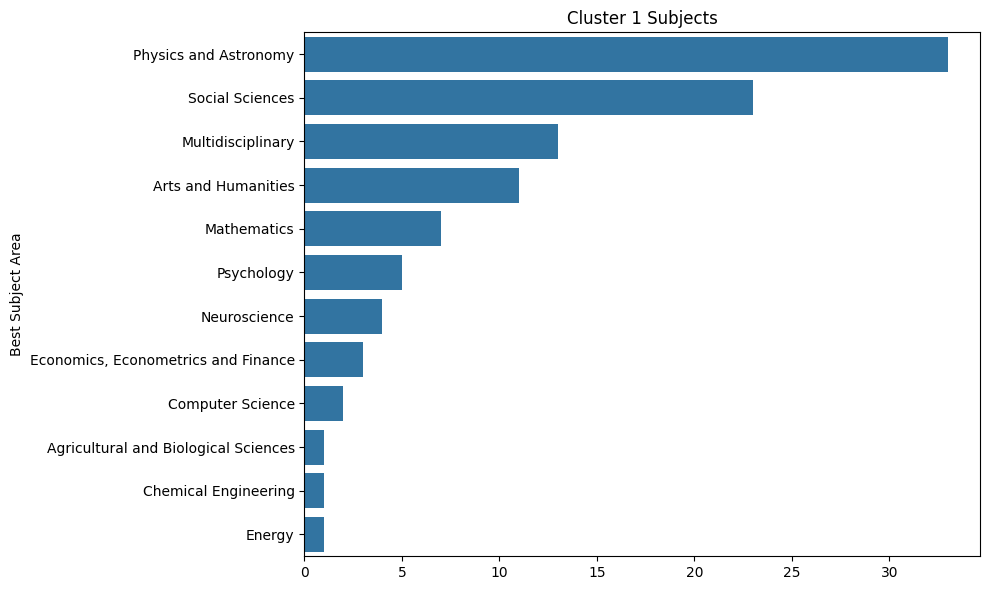

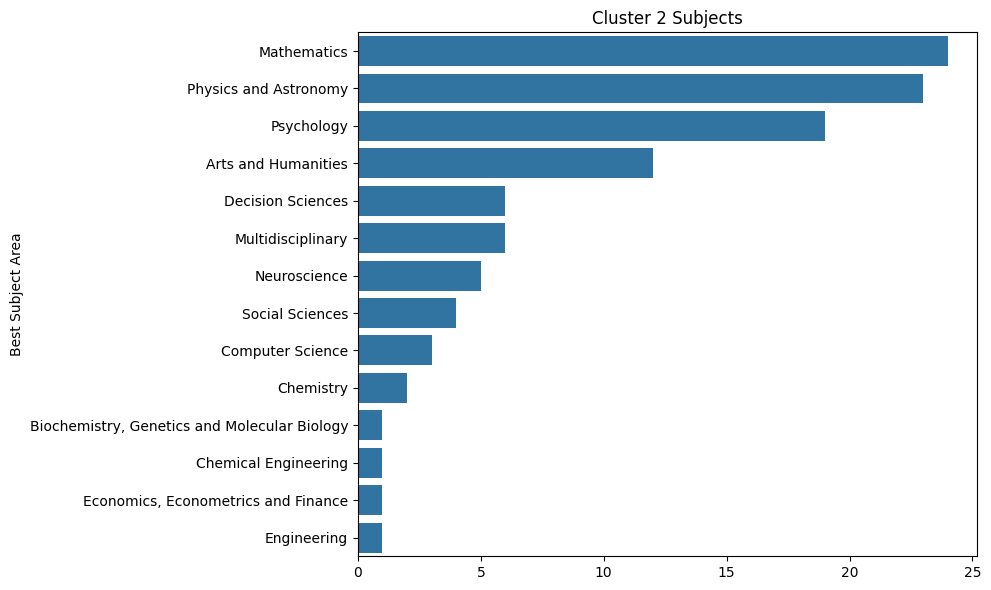

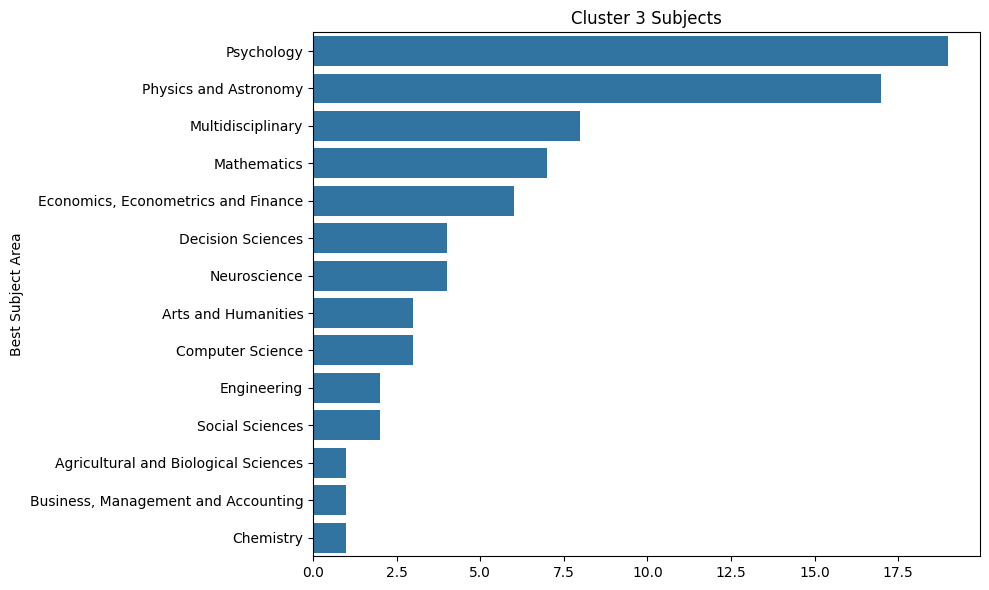

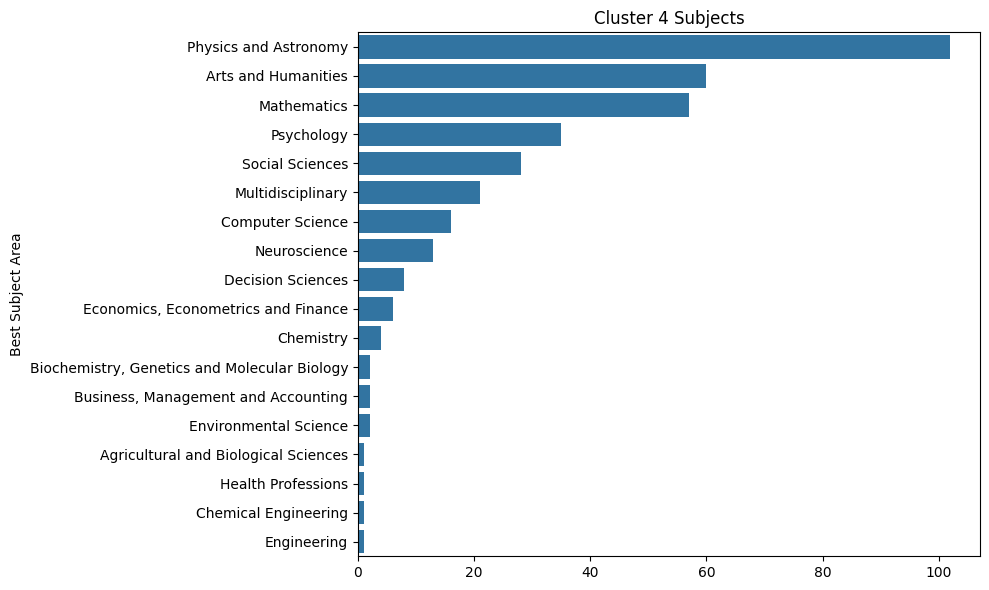

In [100]:
for i, cluster in enumerate(clusters, 1):
   category_counts = cluster.groupby('Best Subject Area').size().sort_values(ascending=False)
   plt.figure(figsize=(10, 6))
   sns.barplot(x=category_counts.values, y=category_counts.index)
   plt.title(f'Cluster {i} Subjects')
   plt.tight_layout()

In [119]:
# We can also look at other journal data per cluster - H-index stats per cluster
hindex_stats = []
for i, cluster in enumerate(clusters, 1):
   stats = cluster['H-index'].describe()
   hindex_stats.append(f"Cluster {i}: mean={stats['mean']:.1f}, median={stats['50%']:.1f}")

for stat in hindex_stats:
   print(stat)

Cluster 1: mean=108.8, median=72.0
Cluster 2: mean=106.8, median=80.0
Cluster 3: mean=110.6, median=77.5
Cluster 4: mean=96.2, median=76.0


In [117]:
# quartiles
quartile_stats = []
for i, cluster in enumerate(clusters, 1):
   stats = cluster['Best Quartile'].value_counts().sort_index()
   print(f"\nCluster {i} Quartiles:")
   print(stats)


Cluster 1 Quartiles:
Best Quartile
Q1    54
Q2    41
Q3     9
Name: count, dtype: int64

Cluster 2 Quartiles:
Best Quartile
Q1    38
Q2    50
Q3    19
Q4     1
Name: count, dtype: int64

Cluster 3 Quartiles:
Best Quartile
Q1    30
Q2    39
Q3     8
Q4     1
Name: count, dtype: int64

Cluster 4 Quartiles:
Best Quartile
Q1    141
Q2    167
Q3     51
Q4      1
Name: count, dtype: int64
